# Saturation time constant map

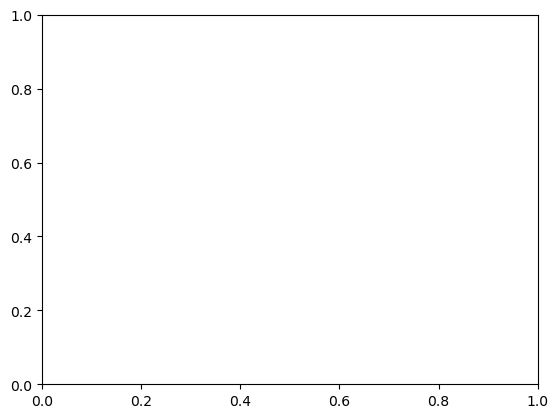

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = plt.cm.rainbow(np.linspace(0, 1, 9))
# cmap = plt.cm.Reds(np.linspace(0, 1, 9))
fig, ax = plt.subplots() 
def plot_ratio(file, index, PEns):
    """plot waveform 
    parameter:
        df : scaled data with pandas DataFrame
        cmap_index: 0,1,2,3...
        voltage(str): '1p8v' LED driver voltage
    """ 
    df = pd.read_hdf(file, key='winfo')      
    ax.errorbar( df.Delta_t, df.R2ref, yerr=df.R2ref_err, fmt='.',  color=cmap[index], alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2, label=r'{} PE/ns'.format(PEns))      
    ax.set_xlabel('Delta_t [us]')  
    ax.set_ylabel('Surviving Factor')
    ax.set_title('')
    # ax.set_xscale('log')
    # ax.legend(loc='upper left')
    ax.set_xlim(-100, 100000)
    ax.set_ylim(0.8, 1.2)
    ax.legend()  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from matplotlib import cm


def plot_ratio(file, intensity, color):
    df = pd.read_hdf(file, key='winfo')
    ax.errorbar(df.Delta_t, df.R2ref, yerr=df.R2ref_err, fmt='.', color=color,
                alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2,
                label='')


fig, ax = plt.subplots(figsize=(12,8)) 
plt.rcParams.update(params)
plt.rcParams['text.usetex'] = False

voltage_map = {'3p5v_1p75v':13166, '3p25v_1p625v':11568, '3v_1p5v':9970, '2p75v_1p375v':8372,
               '2p5v_1p25v':6774, '2p25v_1p125v':5176, '2v_1v':3578, '1p75v_875mv':1980, '1p5v_750mv':382}

# 假设已有数据
delay_times = np.logspace(0, 4, 10)  # 延迟时间
intensities = np.array([382, 1980, 3578, 5176, 6774, 8372, 9970, 11568, 13166])

# 归一化光强
norm = mcolors.Normalize(vmin=intensities.min(), vmax=intensities.max())
# cmap = plt.cm.viridis
cmap = plt.cm.rainbow

flist = 'runlist/scale_file_list_correction_scaled_corrected_1us'
# i = 0
with open(flist,  'r') as list:
    for line in list: 
        file = line.rstrip('\n')
        voltage= file.split('combine_')[1].split('_1p36v_')[0]
        intensity = voltage_map.get(voltage)
        color = cmap(norm(intensity))
        plot_ratio(file, intensity, color)
        
        
# 添加colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Intensity [PE/ns]')

# 设置colorbar刻度为科学计数法
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1,1))  # 例如：当数值 <0.1 或 >10时用科学计数法
cbar.ax.yaxis.set_major_formatter(formatter)
cbar.update_ticks()

ax.set_xlabel('Delay Time [us]')
ax.set_ylabel('Surviving Factor')   
ax.axhline(y=1.0, color='grey', linestyle='--', label='')
# ax.set_title(title)
ax.set_xscale('log')
ax.set_ylim(0.70,1.05)
# ax.set_xlim(-1.E3,1.5E3)
ax.set_xlim(-1.E4,3.E3)
plt.savefig('figs/surviving_factor.pdf',dpi=300)
plt.show()

In [7]:
print(plt.rcParams['text.usetex'])

True


# LED Configuration

In [1]:
import pandas as pd
import numpy as np
import constant as cts

def linear_fit(x_data, y_data):
    import numpy as np
    coefficients = np.polyfit(x_data, y_data, 1)  
    return coefficients

file = 'outnpy/lv2415_20DB_lv2414_12DB_20241210_3p5v_2pv_calibration_single_gussain_fit_all_scaled_PEns.h5py'
df_20dB = pd.read_hdf(file, key='winfo')
file = 'outnpy/lv2415_9DB_lv2414_0DB_20241212_1p75v_3p35v_calibration_single_gussain_fit_all_scaled_PEns.h5py'
df_9dB = pd.read_hdf(file, key='winfo')
df = pd.concat([df_20dB,df_9dB], ignore_index=True)


In [2]:
left = df.Voltage >= 1.6
right = df.Voltage < 2
df_linear = df[left & right]
slope, intercept = linear_fit(df_linear.Voltage, df_linear.PEns_filter)
print(slope, intercept)
x = np.linspace(1.35, 3.5, 1000)
y = slope * x + intercept

df_tc = df[df.Voltage >= 2]
df_dyan = df[df.Voltage < 1.6]

6392.332378097937 -9206.740906084735


In [3]:
volt = [1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5]
for v in volt:
    PEs = slope * v + intercept
    print(PEs)

381.7576610621709
1979.8407555866543
3577.9238501111395
5176.006944635625
6774.090039160108
8372.173133684591
9970.256228209077
11568.339322733562
13166.422417258043


In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update(cts.params)
from matplotlib import cm
# cmap = plt.cm.rainbow(np.linspace(0, 1, 7))
fig, ax = plt.subplots(figsize=(10,8))
ax.errorbar(df.Voltage, df.PEns_filter, yerr=df.PEns_filter_err, fmt='.', markersize=8, ecolor='black', mfc='black', mec='black',capsize=3, elinewidth=2, capthick=2, label='')
ax.errorbar(df_tc.Voltage, df_tc.PEns_filter, yerr=df_tc.PEns_filter_err, fmt='.',markersize=8, color = 'black', alpha=0.9,  capsize=3, elinewidth=2, capthick=2, label='Time constant region')
ax.errorbar(df_linear.Voltage, df_linear.PEns_filter, yerr=df_linear.PEns_filter_err, fmt='.', markersize=8, color = 'b', capsize=3, elinewidth=2, capthick=2, label='LED linearity region')
ax.errorbar(df_dyan.Voltage, df_dyan.PEns_filter, yerr=df_dyan.PEns_filter_err, fmt='.', markersize=8, color ='g',capsize=3, elinewidth=2, capthick=2, label='Anode Saturation region')
ax.set_xlabel('LED Driver Voltage (V)')
ax.set_ylabel('Light Intensity[PE$\cdot$$ns^{-1}$]')
ax.set_title('')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1.25, 3.75)
# ax.set_xlim(1.25, 2.5)
ax.set_ylim(-1.E3, 6.E3)
# ax.set_ylim(-1.E3, 2.E4)
ax.set_xticks([1.35, 1.6,  1.8,  2.0, 2.25, 2.5, 2.75, 3, 3.25, 3.5])
ax.set_xticklabels(['1.35', '1.6', '1.8', '2.0', '2.25', '2.5', '2.75', '3.0', '3.25', '3.5'])
# ax.set_title('LED output configuration map')
ax.plot(x, y, linestyle='--', linewidth=2, color='black', alpha=0.8,  label='')
ax.axhline(y=0.0, color='grey', linestyle='--', label='')
# ax.legend(loc='upper left', fontsize=12)
plt.style.use('relics.mplstyle')
# plt.savefig(r'./figs/LED_configure.png', dpi=300)
plt.savefig(r'./figs/LED_configure.pdf', dpi=300)
plt.show()

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update(cts.params)

from matplotlib import cm
cmap = plt.cm.rainbow(np.linspace(0, 1, 7))
fig, ax = plt.subplots(figsize=(10,8))
plt.style.use('relics.mplstyle')
ax.errorbar(df.Voltage, df.PEns_filter, yerr=df.PEns_filter_err, fmt='.', markersize=8, ecolor='black', mfc='black', mec='black',capsize=3, elinewidth=2, capthick=2, label='')
ax.errorbar(df_tc.Voltage, df_tc.PEns_filter, yerr=df_tc.PEns_filter_err, fmt='.',markersize=8, color = 'black', alpha=0.9,  capsize=3, elinewidth=2, capthick=2, label='Time constant region')
ax.errorbar(df_linear.Voltage, df_linear.PEns_filter, yerr=df_linear.PEns_filter_err, fmt='.', markersize=8, color = 'b', capsize=3, elinewidth=2, capthick=2, label='LED linearity region')
ax.errorbar(df_dyan.Voltage, df_dyan.PEns_filter, yerr=df_dyan.PEns_filter_err, fmt='.', markersize=8, color ='g',capsize=3, elinewidth=2, capthick=2, label='Anode Saturation region')
# ax.set_xlabel('LED driver voltage (V)')
ax.set_ylabel('Light Intensity[PE$\cdot$$ns^{-1}$]')
ax.set_title('')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.25, 2.5)
# ax.set_ylim(-1.E3, 2.E4)
ax.set_xticks([1.35, 1.44, 1.5,1.55, 1.6, 1.75])
ax.set_xticklabels(['1.35', '1.44', '1.5','1.55', '1.6', '1.75'])
# ax.set_title('LED output configuration map')
ax.plot(x, y, linestyle='--', linewidth=2, color='black', alpha=0.8,  label='')
ax.axhline(y=0.0, color='grey', linestyle='--', label='')
# ax.legend(loc='upper left', fontsize=12)
ax.set_ylim(-1.E2, 1.1E3)
ax.set_xlim(1.3, 1.65)

# plt.savefig(r'./figs/LED_configure_log.png',dpi=300)
plt.savefig(r'./figs/LED_configure_log.pdf',dpi=300)
plt.show()

## Combine LED configu 

In [5]:
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# PDF路径
main_pdf_path = 'figs/LED_configure.pdf'
thumb_pdf_path = 'figs/LED_configure_log.pdf'
# output_pdf_path = 'figs/combined_LED_configure.pdf'

# 将PDF第一页转换为PIL图像
def pdf_to_image(pdf_path):
    images = convert_from_path(pdf_path, dpi=300)  # dpi可调节清晰度
    return images[0]  # 取第一页

# 载入图像
main_img = pdf_to_image(main_pdf_path)
thumb_img = pdf_to_image(thumb_pdf_path)

# 创建画布
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

# 显示主图
ax.imshow(main_img)

# 创建缩略图的OffsetImage
zoom_factor = 0.12  # 缩略图缩放比例
thumb_offset_image = OffsetImage(thumb_img, zoom=zoom_factor)

# 设定缩略图位置（右下角）
# 坐标系是图像坐标，(1,0)是右下角，稍微往左上偏移一点
ab = AnnotationBbox(thumb_offset_image, (0.73, 0.45),
                    xycoords='axes fraction',
                    frameon=False,
                    pad=0.3,
                    bboxprops=dict(edgecolor='black', linewidth=1))

ax.add_artist(ab)

# 保存合成图
plt.savefig('figs/combined_LED_configure.pdf', bbox_inches='tight', dpi=300)
plt.savefig('figs/combined_LED_configure.png', bbox_inches='tight', dpi=300)
plt.show()

# Anode to Dynode ratio

In [4]:
import pandas as pd
import numpy as np
import constant as cts
file = 'outnpy/lv2415_9DB_lv2414_0DB_20241212_1p75v_3p35v_calibration_single_gussain_fit_all_scaled_PEns.h5py'
df = pd.read_hdf(file, key='winfo')


In [5]:
df

,Ch0_s2_mu,Ch1_s2_mu,Ch2_s2_mu,S2_width,S1_width,Voltage,ftag,Ch0_s2_sigma,Ch1_s2_sigma,Ch2_s2_sigma,PEns_filter,PEns_filter_err,PEns_dynode,PEns_dynode_err,PEns_anode,PEns_anode_err
0,13401.129842,3660.354128,2969.358883,1000,150,1.75,lv2415_9DB_lv2414_0DB_20241210_1p75v_calibrati...,37.101462,60.037478,8.673433,2039.052308,76.937736,2400.446639,63.196672,89.340866,1.216620
1,12534.071597,1755.060204,1901.062974,1000,150,1.60,lv2415_9DB_lv2414_0DB_20241210_1p6v_calibratio...,35.642021,44.399174,7.105753,977.681239,41.417952,1536.830140,40.618635,83.560477,1.139196
2,12024.807146,1206.058089,1335.018157,1000,150,1.55,lv2415_9DB_lv2414_0DB_20241210_1p55v_calibrati...,35.201907,36.708092,6.699525,671.851805,30.648954,1079.236285,28.752375,80.165381,1.094331
3,11898.212682,1104.317858,1216.232606,1000,150,1.54,lv2415_9DB_lv2414_0DB_20241210_1p54v_calibrati...,35.433994,35.401634,6.309262,615.175964,28.738426,983.209369,26.225936,79.321418,1.083679
4,11756.893233,1004.588686,1097.004056,1000,150,1.53,lv2415_9DB_lv2414_0DB_20241210_1p53v_calibrati...,35.430831,33.686529,5.941717,559.620410,26.716364,886.824329,23.695271,78.379288,1.071418
5,11605.507069,910.767990,982.689888,1000,150,1.52,lv2415_9DB_lv2414_0DB_20241210_1p52v_calibrati...,35.213263,32.302226,5.722745,507.356258,24.920400,794.412105,21.294024,77.370047,1.057974
6,11433.785456,818.319766,869.112360,1000,150,1.51,lv2415_9DB_lv2414_0DB_20241210_1p51v_calibrati...,35.572233,30.545273,5.437088,455.856660,23.010488,702.595384,18.901222,76.225236,1.043637
7,11236.000111,722.778989,750.429539,1000,150,1.50,lv2415_9DB_lv2414_0DB_20241210_1p5v_calibratio...,36.619882,28.787573,5.108130,402.634312,21.079870,606.651515,16.401099,74.906667,1.028160
8,10987.809848,630.638899,639.356873,1000,150,1.49,lv2415_9DB_lv2414_0DB_20241210_1p49v_calibrati...,36.426598,26.894167,4.746987,351.306365,19.156206,516.859739,14.057315,73.252066,1.006432
9,10736.978447,549.019567,542.487293,1000,150,1.48,lv2415_9DB_lv2414_0DB_20241210_1p48v_calibrati...,36.755238,25.200942,4.463178,305.839156,17.466739,438.549819,12.028334,71.579856,0.985352


In [6]:
def linear_fit(x_data, y_data):
    import numpy as np
    coefficients = np.polyfit(x_data, y_data, 1)  # coefficients为[a, b]，a为斜率，b为截距  y = ax + b
    return coefficients

slope_0, intercept_0 = linear_fit(df.PEns_filter, df.PEns_filter)
print(slope_0, intercept_0)
x = np.linspace( 2, np.max(df.PEns_filter), 10000 )
y_0 = slope_0 * x + intercept_0

1.0 5.896789022400505e-14


In [7]:
from scipy.optimize import curve_fit
def log_model(x, a, b):
    return a * np.log(x) + b
popt, pcov = curve_fit(log_model, df.PEns_filter, df.PEns_anode)
a_best, b_best = popt
print(f"Best fit parameters: a = {a_best:.2f}, b = {b_best:.2f}")
x_ = np.linspace( 30, np.max(df.PEns_filter), 10000 )
y_2 = log_model(x_, a_best, b_best)

Best fit parameters: a = 15.40, b = -18.88


In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update(cts.params)
fig, ax = plt.subplots(figsize=(10,8))
ax.errorbar(df.PEns_filter, df.PEns_dynode, xerr=df.PEns_filter_err, yerr=df.PEns_dynode_err, fmt='.', markersize=10, ecolor='g', mfc='g', mec='g', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='dynode')
ax.errorbar(df.PEns_filter, df.PEns_anode, xerr=df.PEns_filter_err, yerr=df.PEns_anode_err, fmt='.', markersize=10, color='black',  alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='Anode')

ax.plot(x_, y_2, color='black', alpha=0.8, linestyle='--', linewidth=2, label=f'y={a_best:.1f} log(x) {b_best:.1f}')
ax.plot(x, y_0, color='b', alpha=0.8, linestyle='--', linewidth=2, label=f'y={slope_0:.1f} x ')
ax.axvline(x=10, color='purple', alpha=0.8,  linestyle='--', linewidth=2, label='Muon-S2') 
ax.axvline(x=500, color='r', alpha=0.8,  linestyle='--', linewidth=2, label='Muon-S1') 
ax.set_ylabel('Measureed[PE$\cdot$$ns^{-1}$]')
ax.set_xlabel('$S_{in}$ [PE$\cdot$$ns^{-1}$]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best', fontsize=18,title_fontsize=20,shadow=False, fancybox=False, framealpha=0.)
ax.set_xlim(-1.E1, 3.e3)
ax.set_ylim(1.E0, 3.5e3)
plt.savefig(r'./figs/Anode_dynode_PEns.pdf',dpi=300)
plt.show()

/tmp/ipykernel_4032279/1913030208.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-1.E1, 3.e3)


In [34]:
df_rep = df[df.PEns_filter < 2000]
def linear_model(x, m, c):
    return m * x + c
popt, pcov = curve_fit(linear_model, df_rep.PEns_dynode, df_rep.PEns_filter)
print(popt, pcov)

[ 0.62120656 18.24290255] [[ 4.22843672e-05 -1.74938543e-02]
 [-1.74938543e-02  1.45826694e+01]]


In [35]:
m,c = popt
sigma_m = np.sqrt(pcov[0, 0]) 
sigma_c = np.sqrt(pcov[1, 1])
cov_mc = pcov[0, 1]
m, sigma_m, c, sigma_c, cov_mc 

(0.6212065639173936,
 0.00650264309020608,
 18.242902549079126,
 3.8187261513467847,
 -0.01749385433588928)

In [41]:
x = np.linspace(5, 2000, 10000 )
y = linear_model(x, popt[0], popt[1])
y_err = np.sqrt( x**2*sigma_m + sigma_c**2 + x*cov_mc)

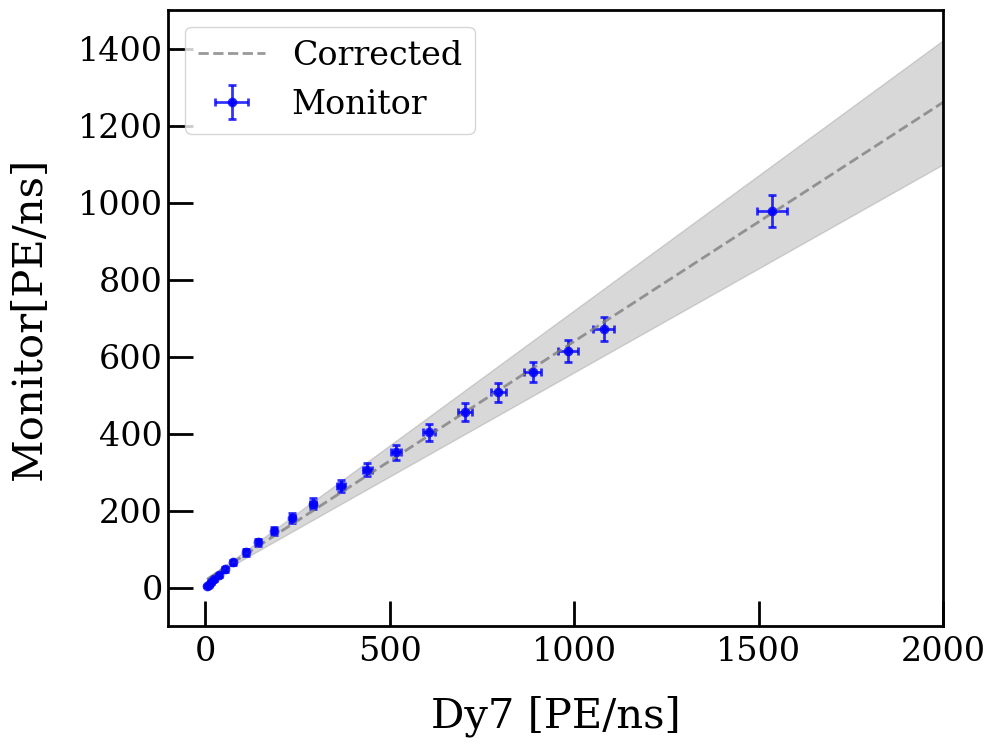

In [44]:
import matplotlib.pyplot as plt
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,8))
ax.errorbar(df.PEns_dynode, df.PEns_filter,  xerr=df.PEns_dynode_err , yerr=df.PEns_filter_err , fmt='.', markersize=10, ecolor='b', mfc='b', mec='b', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='Monitor')
# ax.errorbar(df.PEns_filter, df.PEns_filter, xerr=df.PEns_filter_err, yerr=df.PEns_filter_err, fmt='.', markersize=10, color='b',  alpha=0.5, capsize=3, elinewidth=2, capthick=2, label='Monitor')
ax.plot(x, y, color='grey', alpha=0.8, linestyle='--', linewidth=2, label=f'Corrected')
ax.fill_between(x, y - y_err, y + y_err, color='grey', alpha=0.3)  

ax.set_ylabel('Monitor[PE/ns]')
ax.set_xlabel('Dy7 [PE/ns]')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.legend(loc='upper left')
# ax.grid()
ax.set_xlim(-1.E2, 2e3)
ax.set_ylim(-1.E2, 1.5e3)
# ax.set_title('PMT-R8520-406 Saturation Evaluation')
# plt.savefig(r'./figs/PMT_R8520_406_saturation_evaluation_PEns_20241112.png',dpi=300)
# plt.savefig(r'./figs/PMT_R8520_406_saturation_evaluation_PEns_20241112.pdf',dpi=300)
plt.savefig(r'./figs/area_corrected.pdf',dpi=300)
# plt.savefig(r'./figs/Anode_dynode_PEns_corrected.png',dpi=300)
plt.show()

In [ ]:
import fit_package
file_list = 'runlist/waveform_process_Rd7'
Channel = 'Dynode'
wf_dic = {}
wf_dic, base_config = ft.wf_array_S1(file_list, Channel=Channel)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = plt.cm.rainbow(np.linspace(0, 1, 9))
fig, ax = plt.subplots() 

def plot_waveform(mean_wf, std_wf, cmap_index, delta_t):
    """plot waveform 
    parameter:
        mean_wf (np.array): mean value of waveform.
        std_wf (np.array): standard deviation of waveform, same length with mean_wf.
        Channel (str): 'Anode or Dynode'
        LED_config (str): '1p8v_900mv'
    """ 
    x = np.arange(len(mean_wf))  
    ax.fill_between(x, mean_wf - std_wf, mean_wf + std_wf, color=cmap[cmap_index], alpha=0.3)  
    ax.plot(x, mean_wf, color=cmap[cmap_index], label=delta_t)  
    ax.set_xlabel('Sample Index[4ns]')
    ax.set_ylabel('Amplitude[ADC]')  
 

In [ ]:
import fit_package
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = plt.cm.rainbow(np.linspace(0, 1, 9))

fig, ax = plt.subplots(figsize=(12, 8)) 
i = 0
for Rd7, data in wf_dic.items():
    plot_waveform(data['mean_wf'], data['std_wf'], i , Rd7)
    i +=1
ax.set_xlabel('Sample Index[4ns]')
ax.set_ylabel('Amplitude[ADC]')   
# ax.set_title(title)
ax.set_xlim(0,200)
plt.legend(loc='upper right')    
# print(save_path)
plt.savefig('figs/wf_dy7_Rd7_compare.png',dpi=300)
plt.savefig('figs/wf_dy7_Rd7_compare.pdf',dpi=300)
plt.show()

In [ ]:
import fit_package
file_list = 'runlist/waveform_process_Rd7'
Channel = 'Anode'
wf_dic_ = {}
wf_dic_, base_config = fit_package.wf_array_S1(file_list, Channel=Channel)

In [ ]:
import fit_package
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = plt.cm.rainbow(np.linspace(0, 1, 9))

fig, ax = plt.subplots(figsize=(12, 8)) 
i = 0
for Rd7, data in wf_dic_.items():
    plot_waveform(data['mean_wf'], data['std_wf'], i , Rd7)
    i +=1
ax.set_xlabel('Sample Index[4ns]')
ax.set_ylabel('Amplitude[ADC]')   
# ax.set_title(title)
ax.set_xlim(0,200)
plt.legend(loc='upper right')    
# print(save_path)
plt.savefig('figs/wf_anode_Rd7_compare.png',dpi=300)
plt.savefig('figs/wf_anode_Rd7_compare.pdf',dpi=300)
plt.show()

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import constant
from matplotlib import cm
cmap = plt.cm.rainbow(np.linspace(0, 1, 5))
cmp = plt.cm.rainbow(np.linspace(0, 1, 7))
plt.rcParams.update(constant.params)

signals = ['CEvNS','Radiation Gamma', 'Axion', 'Prototype Muon', 'RELICS Muon']  # 纵坐标标签
energy_ranges = [(0.0003, 0.001),(0.0285, 2), (0.2, 10), (13.3, 51.2), (51.2, 153.6)]  # 能量范围 (MeV)
pmt_ranges = ['Anode', 'Dy7', '','', 'Dy5']  # PMT信号范围 (任意单位)

fig, ax = plt.subplots(figsize=(12, 8))


for i, signal in enumerate(signals):
    ax.barh(i, width=energy_ranges[i][1] - energy_ranges[i][0], 
            left=energy_ranges[i][0], height=0.6, color=cmap[i], edgecolor='black')
    

    ax.text((energy_ranges[i][0] + energy_ranges[i][1])/2 ,i+0.2 , 
            signals[i],
            ha='center', va='top', fontsize=20, color='Black')
# 
ax.set_yticks(np.arange(len(signals)))
ax.set_yticklabels('')
ax.set_xlabel('Deposition Energy (MeV)')
ax.set_xscale('log') 
# ax.grid(True, which="both", ls="--", linewidth=0.5)

'''
Xe isotope sources:

ax.axvline(0.0396, color=cmp[1],alpha=0.6, linestyle='--', linewidth=1, label='$^{129}Xe*$')
ax.text(0.0396, 3.5, '$^{129}Xe*$', fontsize=12, color=cmp[1], alpha=0.8, ha='center', va='center')
ax.axvline(0.0802, color=cmp[1],alpha=0.8, linestyle='--', linewidth=1, label='$^{131}Xe*$')
ax.text(0.0802, 4.2, '$^{131}Xe*$', fontsize=12, color=cmp[1], ha='center', va='center')

ax.axvline(0.164, color=cmp[1],alpha=0.8, linestyle='--', linewidth=1, label='$^{131m}Xe$')
ax.text(0.164, 3.8, '$^{131m}Xe$', fontsize=12, color=cmp[1], ha='center', va='center')

ax.axvline(0.2362, color=cmp[1],alpha=0.8, linestyle='--', linewidth=1, label='$^{129m}Xe$')
ax.text(0.2362, 4.3, '$^{129m}Xe$', fontsize=12, color=cmp[1], ha='center', va='center')

ax.axvline(0.203, color=cmp[1],alpha=0.8, linestyle='--', linewidth=1,label='$^{127}Xe$')
ax.text(0.203, 4., '$^{127}Xe$', fontsize=10, color=cmp[1], ha='center', va='center')

ax.axvline(0.375, color=cmp[1],alpha=0.8, linestyle='--', label='$^{127}Xe$')
# ax.text(0.375, 4.1, '$^{127}Xe$', fontsize=10, color=cmp[1], ha='center', va='center')

ax.axvline(0.408, color=cmp[1],alpha=0.8, linestyle='--', linewidth=1, label='$^{127}Xe$')
ax.text(0.408, 4.4, '$^{127}Xe$', fontsize=12, color=cmp[1], ha='center', va='center')
'''

'''
other sources:
'''
ax.axvline(0.0057, color='black',alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$^{3}H$')
ax.text(0.0052, 4., '$^{3}H$', fontsize=12, color='black', ha='center', va='center', rotation=90)

ax.axvline(0.00282, color='black',alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$^{37}Ar$')
ax.text(0.0025, 4., '$^{37}Ar$', fontsize=12, color='black', ha='center', va='center', rotation=90)

ax.axvline(0.0415, color='black',alpha=0.8, linestyle='--', linewidth=1.5, label='$^{83m}Kr$')
ax.text(0.0415+0.008, 4., '$^{83m}Kr$', fontsize=12, color='black', alpha=1, ha='center', va='center', rotation=90)

ax.axvline(0.662, color='black',alpha=0.8, linestyle='--', linewidth=1.5, label='$^{137}}Cs$')
ax.text(0.63, 4., '$^{137}Cs$', fontsize=12, color='black', alpha=1, ha='center', va='center', rotation=90)

ax.axvline(0.12206, color='black',alpha=0.8, linestyle='--', linewidth=1.5, label='$^{57}Co$')
ax.text(0.115, 4., '$^{57}Co$', fontsize=12, color='black', alpha=1, ha='center', va='center', rotation=90)
ax.axvline(0.13647, color='black',alpha=1, linestyle='--', linewidth=1.5, label='$^{57}Co$')
# ax.text(0.13647, 3.5, '$^{57}Co$', fontsize=12, color='black', alpha=1, ha='center', va='center', rotation=90)

ax.axvline(1.173, color='black', alpha=0.8, linestyle='--', linewidth=1.5, label='$^{60}Co$')
ax.text(1.1, 4., '$^{60}Co$', fontsize=12, color='black', alpha=1, ha='center', va='center', rotation=90)
ax.axvline(1.332, color='black',alpha=1, linestyle='--', linewidth=1.5, label='$^{60}Co$')
# ax.text(1.332, 4., '$^{60}Co$', fontsize=12, color='black', alpha=1, ha='center', va='center', rotation=90)


ax.axvline(2.45/131, color='black',alpha=0.8, linestyle='--', linewidth=1.5, label='$DD$')
ax.text(2.45/131-0.001, 4., '$DD$', fontsize=12, color='black', ha='center', va='center', rotation=90)

ax.axvline(2.614, color='black',alpha=0.8, linestyle='--', linewidth=1.5, label='$^{232}Th}$')
ax.text(2.3, 4., '$^{232}Th$', fontsize=12, color='black', ha='center', va='center', rotation=90)

ax.axvline(4.43/131, color='black',alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$Ambe$')
ax.text(4.43/131-0.002, 4., '$AmBe$', fontsize=12, color='black', ha='center', va='center', rotation=90)


'''
readout range:
'''
ax.axvspan(0.0003, 0.1, color='lightblue', alpha=0.5, label='Anode')
ax.text(0.001, 3, 'Anode', fontsize=24, color='lightblue', ha='center', va='center', bbox=dict(facecolor='NONE', edgecolor='lightblue', alpha=1))
ax.axvspan(0.05, 70, color='lightgreen', alpha=0.3, label='Dy7')
ax.text(1, 3, 'Dy7', fontsize=24, color='lightgreen', ha='center', va='center', bbox=dict(facecolor='NONE', edgecolor='lightgreen', alpha=1))
ax.axvspan(40, 250, color='lightcoral', alpha=0.2, label='Dy5') 
ax.text(200, 2.5, 'Dy6', fontsize=24, color='lightcoral', ha='center', va='center', bbox=dict(facecolor='NONE', edgecolor='lightcoral', alpha=1))
'''
ax_top = ax.twiny()
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks([x[0] for x in energy_ranges])  # 只设置每个区间的起点
ax_top.set_xticklabels(pmt_ranges, rotation=0, ha='left')
# ax_top.set_xlabel('Dynamic Readout Range', labelpad=15)
'''
# plt.title('Dynamic Readout Range for Various Signals')
plt.savefig(r'./figs/signal_ranges.png',dpi=300)
plt.savefig(r'./figs/signal_ranges.pdf',dpi=300)
plt.tight_layout()
plt.show()

## SPE Gain Spectrum

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import fit_package as ft
import plot_tools as pt
import analysis_data as ad
import process_data as prc

In [2]:
f = 'runlist/tpc_4pmt_fiberin_800V_processed'
flist = ad.read_file_names(f)
df = ad.merge_files(flist)
df_0 = df[df.Ch== 0]


/mnt/data/outnpy/r8520_4pmt_800V_tpc_LED_CLA_20250623_run0_raw_b0_seg0.h5py


Param 0: 64012.5802 ± 309.7464
Param 1: -0.4305 ± 0.0050
Param 2: 0.9605 ± 0.0058
Param 3: 5745.4498 ± 165.1710
Param 4: 8.9132 ± 0.2139
Param 5: 4.9040 ± 0.2390
Param 6: 488.0779 ± 288.2075
Param 7: 149.0768 ± 132.0387
Fitted parameters:
Pedestal: A0=64012.58, mu0=-0.43± 0.005, sigma0=0.96±0.006
SPE:      A1=5745.45, mu1=8.91±0.214, sigma1=4.90±0.214
DPE:      A2=488.08±288.207
TPE:      A3=149.08
[(2.833490680835148, 3291.1068623790497, 'min'), (8.675212111193407, 5983.649044364797, 'max')]
[5983.649044364797] [3291.1068623790497]
R-squared: 1.00


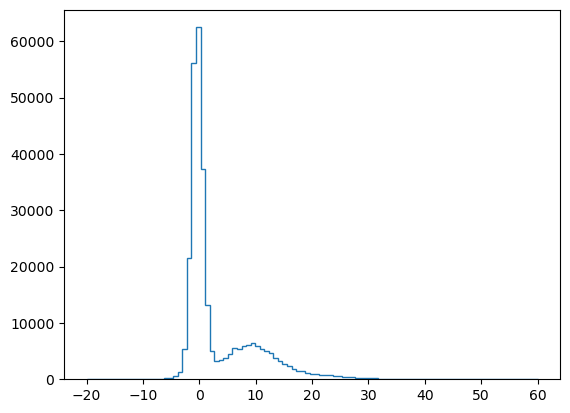

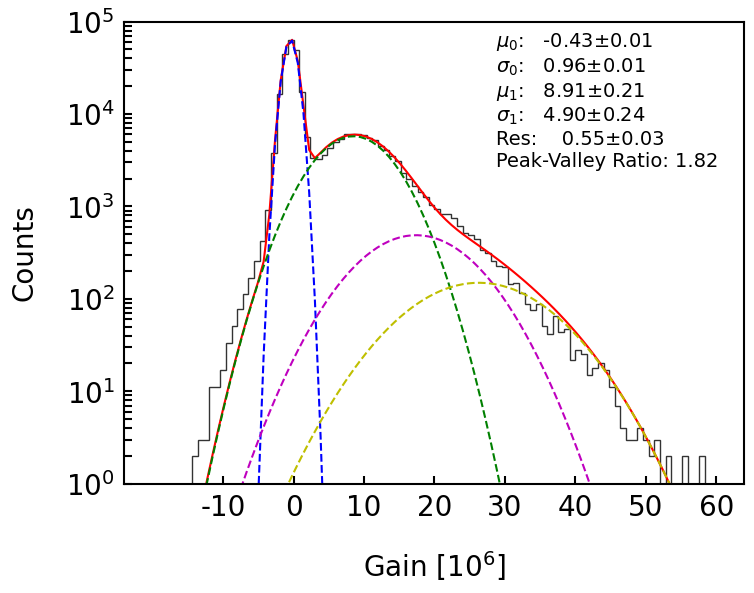

In [3]:
initial_guess = [7.E4, 0, 2, 1.E4, 10, 5, 7.E2, 10E1]
bounds = (
    [1.E3, -2, 0, 1.E2, 0, 1, 1.E1, 1E1],          # 下限（幅值、sigma需≥0）
    [1.E6, 2, 5, 5.E4, 20, 10, 6.E3, 1E3]  # 上限
)
params, params_covariancem, X, Y = ft.three_gauss_fit(df_0, initial_guess, bounds, case=False)
ft.plot_three_gauss_fit(df_0, params,params_covariancem, X, Y, 'LV2204', '800V', save_path=True, case=False)


## Anode to dynode ratio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import fit_package as ft
import plot_tools as pt
import analysis_data as ad
import process_data as prc

In [2]:

f = 'outnpy/tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_LED_5p0V_1kHz_6DB_run1_raw_b0_seg0_single_gussain.h5py'
df = pd.read_hdf(f)
df.head(20)


,ftag,ch0_mu,ch1_mu,ch4_mu,ch5_mu,ch0_sigma,ch1_sigma,ch4_sigma,ch5_sigma
0,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,3075.670061,4129.388505,26.076899,36.286651,142.378428,162.425171,5.648087,5.644776
1,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,7387.894647,9854.531377,58.252121,83.659071,221.568392,250.204096,5.868413,5.971518
2,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,11138.886072,14749.449917,87.124884,126.535365,271.291784,300.758259,6.043466,6.264020
3,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,17387.706680,22535.623642,137.655654,202.557560,334.961576,354.957282,6.364455,6.694283
4,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,22285.835626,28090.172164,180.980560,268.083537,366.610359,359.572999,6.518604,7.014251
5,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,26505.358081,31698.685724,222.831955,330.885084,378.882101,216.353836,6.666080,7.381519
6,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,58582.814661,35283.359235,285.654930,424.751781,677.181995,296.456781,7.029343,7.867003
7,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,63185.621462,37238.774392,323.890958,481.506065,620.266775,268.867427,7.148520,8.053156
8,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,66678.852124,38771.641932,361.578566,537.507002,524.158016,246.869840,7.347660,8.287994
9,tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_L...,69262.102524,40024.998395,399.613537,594.108378,455.388576,228.124268,7.528263,8.522940


In [3]:
ch5_area =df.ch5_mu / 9.19
ch5_err =df.ch5_sigma/9.19
ch1_area = df.ch1_mu / 9.19
ch1_err = df.ch1_sigma/9.19

# x = np.linspace(0,50,100)
# coeffs, cov = np.polyfit(ch5_area[:4],  ch1_area[:4], 1, cov=True)  # 返回 [a, b]
# a, b = coeffs
# a_err, b_err = np.sqrt(np.diag(cov))
# y_fit = np.polyval(coeffs, x)
# y_fit = a * x + b



In [4]:
from scipy.optimize import curve_fit

def linear_zero_intercept(x, a):
    return a * x

popt, pcov = curve_fit(linear_zero_intercept, ch5_area[:4],  ch1_area[:4])
a = popt[0]
a_err = np.sqrt(np.diag(pcov))[0]

In [5]:
a, a_err

(113.30732845703564, 1.5707481174078646)

In [6]:
x_fit = np.linspace(0, 50, 100)
y_fit = a * x_fit
y_fit_err = a_err * x_fit

In [7]:
(ch1_area[14]-ch1_area[0])/(ch5_area[14] - ch5_area[0]) 

43.39183406474334

In [8]:
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import constant as cts
plt.rcParams.update(cts.params)

fig, ax = plt.subplots(figsize=(10, 8))

plt.errorbar(
    x=ch5_area ,
    y=ch1_area ,
    xerr=ch5_err*3,
    yerr=ch1_err*3,
    fmt='.',
    markersize=7, 
    ecolor='black', 
    mfc='black',
    mec='black', 
    alpha=0.8, 
    capsize=2,
    elinewidth=1.5,
    capthick=1.5,
    label='Data'
)
plt.plot(x_fit, y_fit, color='grey', linestyle='--',  linewidth=2, label=f'y={a:.2f} x ')
plt.fill_between(x_fit, y_fit - y_fit_err, y_fit + y_fit_err, color='grey', alpha=0.3, label='')

plt.xlabel('Dynode Area [PE]' )
plt.ylabel('Anode Area [PE]')


plt.tick_params(which='both', direction='in')
plt.tick_params(which='major', length=6)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(3, 3))
ax.yaxis.get_offset_text().set_fontsize(24)
ax.tick_params(axis='y', which='major', pad=10)

plt.legend(loc='center right')#, fontsize=20, frameon=False,)
plt.xlim(0, 125)
plt.ylim(0, 5000)
plt.savefig('figs/adratio.pdf', dpi=300, bbox_inches='tight')
# plt.yscale('log')
plt.show()

## Load afterpulse data

In [3]:
f = '/mnt/data/outnpy/afterpulse_LV2204_LV2437_scan.h5py'
df = pd.read_hdf(f)
df.head()

,Ch,TTT,segment,pulse_index,baseline,start,end,width,height,min_point,area,is_main_pulse,time_interval_start,time_interval_min_point
0,14,1410376,0,0,8178,111,125,14,8178,118,2705.627441,True,0,0
1,14,1410376,0,1,8178,161,165,4,119,163,9.216309,False,50,45
2,14,1410376,0,2,8178,173,179,6,44,175,4.028320,False,62,57
3,14,1410376,0,3,8178,184,191,7,599,188,58.898926,False,73,70
4,14,1410376,0,4,8178,206,211,5,88,208,6.225586,False,95,90


In [4]:
df_14 =df[df.Ch == 14]
df_15 =df[df.Ch == 15]
df_0 =df[df.Ch == 0]
df_1 =df[df.Ch == 1]

# df_14 = pd.concat([df_0, df_14], ignore_index=True)
# df_15 = pd.concat([df_1, df_15], ignore_index=True)

In [5]:
all_filtered_app_14 = prc.filter_all_segments(df_0)
all_filtered_app_15 = prc.filter_all_segments(df_1)

In [6]:
all_filtered_app_15.head(12)

,Ch,TTT,segment,pulse_index,baseline,start,end,width,height,min_point,area,is_main_pulse,time_interval_start,time_interval_min_point
0,1,4740728,89701,0,15319,111,125,14,13665,118,4731.933594,True,0,0
1,1,4740728,89701,1,15319,170,173,3,23,171,0.915527,False,59,53
2,1,4740728,89701,2,15319,199,203,4,81,200,6.713867,False,88,82
3,1,4740728,89701,3,15319,249,255,6,67,251,5.310059,False,138,133
4,1,4740728,89701,4,15319,274,279,5,54,275,2.563477,False,163,157
5,1,4740728,89701,5,15319,286,291,5,59,287,3.845215,False,175,169
6,1,4740728,89701,6,15319,313,320,7,525,316,44.982910,False,202,198
7,1,4740728,89701,7,15319,403,411,8,74,407,6.469727,False,292,289
8,1,4740728,89701,8,15319,638,645,7,61,642,6.103516,False,527,524
9,1,4740728,89701,9,15319,694,701,7,44,698,3.845215,False,583,580


In [7]:
len(df_1)/1.E4,len(df_0)/1.E4

(222.1902, 154.2214)

In [8]:
al2pe_ch15 = all_filtered_app_15[(all_filtered_app_15['area']/8.94 >= 2)]
al2pe_ch14 = all_filtered_app_14[(all_filtered_app_14['area']/9.19 >= 2)]
a2pe_ch15 = all_filtered_app_15[(all_filtered_app_15['area']/8.94 < 2)]
a2pe_ch14 = all_filtered_app_14[(all_filtered_app_14['area']/9.19 < 2)]

In [9]:
(a2pe_ch15.area[a2pe_ch15.time_interval_min_point > 55].sum()  + al2pe_ch15.area[al2pe_ch15.pulse_index != 0].sum()  ) /all_filtered_app_15.area[all_filtered_app_15.pulse_index == 0].sum()*100

2.1663606291725186

In [10]:
(a2pe_ch14.area[a2pe_ch14.time_interval_min_point > 55].sum()  + al2pe_ch14.area[al2pe_ch14.pulse_index != 0].sum()  ) /all_filtered_app_14.area[all_filtered_app_14.pulse_index == 0].sum()*100

2.0599699890379615

## Afterpulse area - delay-time 

In [11]:
import matplotlib.colors
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
import constant as cts
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmp = plt.cm.rainbow(np.linspace(0, 1, 7))

plt.rcParams.update(cts.params)
fig, (ax1, ax2 )= plt.subplots(2,1, sharex=True, figsize=(10, 12))

############## 2D plot ################
hist = ax1.hist2d(all_filtered_app_14.time_interval_min_point[all_filtered_app_14.pulse_index != 0]*4/1000, 
       all_filtered_app_14.area[all_filtered_app_14.pulse_index != 0]/8.39, 
       bins=[100, 100],
       range=[[0, 5.5], [0, 30]],  # 限制绘图范围
       cmap='jet',  #'jet', 'rainbow'
       density=True,
       norm=matplotlib.colors.LogNorm()
    )

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(hist[3], ax=cax)
cbar.set_label('Density', fontsize=18)
cbar.ax.tick_params(labelsize=16)

ax1.set_ylabel('Afterpulse Area[PE]')#,labelpad=20, fontsize=20)
ax1.set_yticks([0, 5, 10, 15, 20, 25],['0', '5', '10', '15', '20', '25'])


ion_labels = ["H$^+$", "He$^+$"]
positions = [0.28, 0.56]
for pos, label in zip(positions, ion_labels):
    ax1.axvline(pos, color='red', alpha=0.8, linestyle='--', linewidth=1.5)
    ax2.axvline(pos, color='red', alpha=0.8, linestyle='--', linewidth=1.5)
    ax2.text(pos, 2.3e4, label, ha='center', va='top', fontsize=18, color='black', rotation=90)

ion_labelss = [ "CH$_4^+$", "N$_2^+$", "Ar$^+$","Xe$^{++}$", "Xe$^+$"]
positionss = [ 1.01, 1.33, 1.58, 2.02, 2.85]

for pos, label in zip(positionss, ion_labelss):
    ax1.axvline(pos, color='grey', alpha=0.8, linestyle='--', linewidth=1.5)
    ax2.axvline(pos, color='grey', alpha=0.8, linestyle='--', linewidth=1.5)
    ax2.text(pos, 2.3e4, label, ha='center', va='top', fontsize=18, color='black', rotation=90)

ax1.tick_params(axis='x', direction='in', labelsize=24, pad=7, length=6,width=1.5,)
ax1.tick_params(axis='y', direction='in', labelsize=24, pad=7, length=6,width=1.5,)

ax2.hist(al2pe_ch15.time_interval_min_point[(al2pe_ch15.pulse_index != 0) ]*4/1000, bins=100, range=(0, 4),
        histtype='stepfilled',
        color='skyblue', 
        edgecolor='skyblue',
        facecolor='skyblue', 
        linewidth=1, alpha=0.9, label='', )
ax2.set_ylabel('Counts')#,labelpad=20, fontsize=20)
ax2.set_ylim(0,2.5E4)
ax2.set_yticks([0.5E4,1E4, 1.5E4, 2E4],[ '0.5E4','1E4', ',1.5E4','2E4'])

ax2.tick_params(axis='x', direction='in', labelsize=24, pad=7, length=6,width=1.5,)
ax2.tick_params(axis='y', direction='in', labelsize=24, pad=7, length=6,width=1.5,)

'''
ax1.tick_params(axis='y', which='major', pad=10)
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)  

'''
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(4, 4))
ax2.yaxis.get_offset_text().set_fontsize(18)


'''
ax2.spines['top'].set_linewidth(1.5)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)  
'''
plt.subplots_adjust(hspace=0)
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5], ['0','0.5', '1', '1.5', '2', '2.5', '3', '4', '5'])
plt.xlabel('Time Delay[$\mu$s]')#,labelpad=20, fontsize=20)

plt.savefig('figs/app_area_dt.png', dpi=300, bbox_inches='tight')
plt.show()

## afterpulse above 2 PE

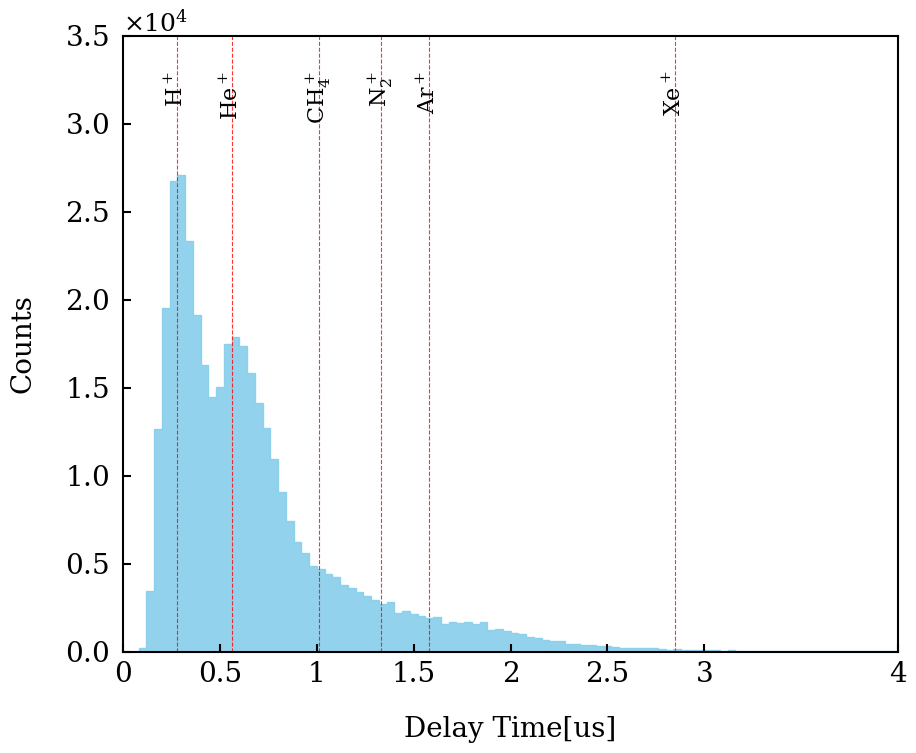

In [96]:

from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

cmp = plt.cm.rainbow(np.linspace(0, 1, 7))
# plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(figsize=(10, 8))
# plt.hist(al2pe_ch14.time_interval_min_point[(al2pe_ch14.pulse_index != 0) ]*4/1000, bins=100, range=(0, 5), histtype='step',linewidth=1, alpha=0.8, label='LV2204-AP')
plt.hist(al2pe_ch15.time_interval_min_point[(al2pe_ch15.pulse_index != 0) ]*4/1000, bins=100, range=(0, 4),
        histtype='stepfilled',
        color='skyblue', 
        edgecolor='skyblue',
        facecolor='skyblue', 
        linewidth=1, alpha=0.9, label='', )
'''
plt.axvline(x=0.28, color=cmp[0],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$H^{+}$')
plt.text(0.22, 5.6E4, '$H^{+}$', fontsize=12, color='black', ha='center', va='center', rotation=90)

plt.axvline(x=0.56, color=cmp[1],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$He^{+}$')
plt.text(0.52, 5.6E4, '$He^{+}$', fontsize=12, color='black', ha='center', va='center', rotation=90)

plt.axvline(x=0.93, color=cmp[2],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$CH_{4}^{+}$')
plt.text(0.92, 5.6E4, '$CH_{4}^{+}$', fontsize=12, color='black', ha='center', va='center', rotation=90)

plt.axvline(x=1.33, color=cmp[3],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$N_{2}^{+}$')
plt.text(1.32, 5.4E4, '$N_{2}^{+}$', fontsize=12, color='black', ha='center', va='center', rotation=90)

plt.axvline(x=1.58, color=cmp[4],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$Ar^{+}$')
plt.text(1.5, 5.2E4, '$Ar^{+}$', fontsize=12, color='black', ha='center', va='center', rotation=90)

plt.axvline(x=1.67, color=cmp[5],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='2$x N_{2}^{++}$')
plt.text(1.88, 5.1E4, '2$x N_{2}^{++}$', fontsize=12, color='black', ha='center', va='center', rotation=90)

plt.axvline(x=2.02, color=cmp[6],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$Xe^{+}$')
plt.text(2.1, 5.E4, '$Xe^{++}$', fontsize=12, color='black', ha='center', va='center', rotation=90)

plt.axvline(x=2.85, color=cmp[6],alpha=0.8, linestyle='--',  linewidth=1.5  ,label='$Xe^{+}$')
plt.text(2.81, 5.E4, '$Xe^{+}$', fontsize=12, color='black', ha='center', va='center', rotation=90)
'''

ion_labels = ["H$^+$", "He$^+$", "CH$_4^+$", "N$_2^+$", "Ar$^+$", "Xe$^+$"]
positions = [0.28, 0.56, 1.01, 1.33, 1.58, 2.85]

for pos, label in zip(positions, ion_labels):
    ax.axvline(pos, color='red', alpha=0.8, linestyle='--', linewidth=0.8)
    ax.text(pos, 3.3e4, label, ha='center', va='top', fontsize=16, color='black', rotation=90)

plt.xlabel('Delay Time[us]',labelpad=20, fontsize=20)
plt.ylabel('Counts',labelpad=20, fontsize=20)

plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)  


ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(4, 4))
ax.yaxis.get_offset_text().set_fontsize(18)

plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 4,  5], ['0','0.5', '1', '1.5', '2', '2.5', '3', '4', '5'])
ax.tick_params(which='both', direction='in', labelsize=20, pad=7, length=6,width=1.5,)
ax.tick_params(axis='y', which='major', pad=10)
plt.ylim(0,3.5E4)
plt.xlim(0,4)

plt.savefig('figs/app_df.pdf', bbox_inches='tight')
plt.show()

# with/without dynode compare

In [41]:
import pandas as pd
import numpy as np

file = '/mnt/data/outnpy/lv2414_9DB_lv2415_0DB_combine_20250122_1p74v_calibration_1kHz_resistor_62p5M_run0_raw_b0_seg0_single_gussain_Saturation_scaled.h5py'
df_r62p5 = pd.read_hdf(file, key='winfo')
file ='/mnt/data/outnpy/lv2414_9DB_lv2415_0DB_combine_20250124_1p74v_calibration_1kHz_62p5M_nody7_run0_raw_b0_seg0_single_gussain_Saturation_scaled.h5py'
df_r62p5_nody7 = pd.read_hdf(file, key='winfo')

import matplotlib.pyplot as plt
plt.rcParams.update(cts.params)
fig, ax = plt.subplots(figsize=(10, 8))
ax.errorbar(
    df_r62p5.PEns_filter, 
    df_r62p5.PEns_anode, 
    xerr=df_r62p5.PEns_filter_err*3, 
    yerr=df_r62p5.PEns_anode_err*3, 
    fmt='.', 
    markersize=7,
    ecolor='black', 
    mfc='black',
    mec='black', 
    # color='r', 
    alpha=0.8,
    capsize=2, 
    elinewidth=1.5,
    capthick=1.5,
    label='With Dynode'
    )
ax.errorbar(
    df_r62p5_nody7.PEns_filter, 
    df_r62p5_nody7.PEns_anode, 
    xerr=df_r62p5_nody7.PEns_filter_err*3, 
    yerr=df_r62p5_nody7.PEns_anode_err*3,
    fmt='.', 
    markersize=7, 
    ecolor='grey', 
    mfc='grey',
    mec='grey', 
    # color='b', 
    alpha=0.5,
    capsize=2, 
    elinewidth=1.5, 
    capthick=1.5,
    label='Anode Only'
    )
# ax.set_ylabel('Ouput[PE/ns]')
# ax.set_xlabel('Input[PE/ns]')
ax.set_ylabel('Measureed[PE$\cdot$$ns^{-1}$]')
ax.set_xlabel('$S_{in}$ [PE$\cdot$$ns^{-1}$]')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.tick_params(which='both', direction='in')
# ax.tick_params(which='major', length=6)
# ax.tick_params(axis='y', which='major', pad=10)
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.ticklabel_format(style='sci', axis='y', scilimits=(3, 3))
# ax.yaxis.get_offset_text().set_fontsize(24)

ax.legend(loc='best',  fontsize=20,title_fontsize=20,shadow=False, fancybox=False, framealpha=0)
ax.set_xlim(-1.E1, 3.e3)
ax.set_ylim(-1.E2, 1.5e2)
plt.savefig(r'./figs/anode_compar.pdf',dpi=300)
plt.savefig(r'./figs/anode_compar.png',dpi=300)
plt.show()

/tmp/ipykernel_5822/3120680039.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-1.E1, 3.e3)
/tmp/ipykernel_5822/3120680039.py:61: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-1.E2, 1.5e2)


## Dark count rate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


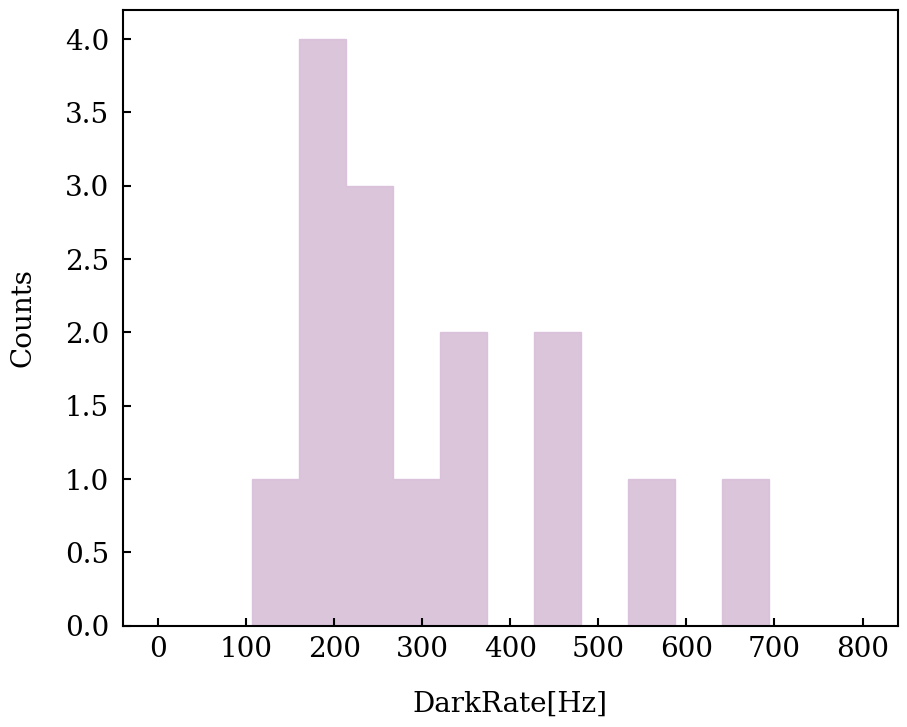

In [100]:
dr_rmtmp = [472.82, 675.12, 354.54, 207.46, 186.97,
            183.78, 159.24, 219.33, 542.29, 478.28,
            259.51, 262.47, 309.91, 195., 320.
            ]
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(dr_rmtmp, bins=15, range=(0, 800),
        histtype='stepfilled',
        color='thistle',  #thistle, lavender
        edgecolor='thistle',
        # facecolor='skyblue', 
        linewidth=1, alpha=0.9, label='', )
plt.xlabel('DarkRate[Hz]',labelpad=20, fontsize=20)
plt.ylabel('Counts', labelpad=20, fontsize=20)

plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)  

ax.tick_params(which='both', direction='in', labelsize=20, pad=7, length=6,width=1.5,)
ax.tick_params(axis='y', which='major', pad=10)
ax.legend(loc='upper right', fontsize=20,title_fontsize=20,shadow=False, fancybox=False, framealpha=0.)

plt.savefig('figs/dr16pcs.pdf', bbox_inches='tight')
plt.show()

In [32]:
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [33]:
t = [0, 65, 130, 195, 260, 325, 390, 455, 520, 585, 650, 715, 770]
dr0 = [6.24, 6.05, 5.90, 5.96, 5.66, 5.91, 5.80, 5.62, 5.82, 5.47, 5.68, 5.57, 5.72]
dr1 = [5.86, 5.63, 5.66, 5.38, 5.70, 5.46, 5.66, 5.57, 5.44, 5.27, 5.61, 5.46, 5.38]

dr0_array =[5.80,  6.04544152,  6.40981034,
         6.16849422,  6.45594315,  9.17084984,  9.26996471,  9.65603745,
         9.72416698,  9.80931059,  9.87510056,  9.9898666 , 10.0059838 ,
         9.99207125, 10.44491018, 10.69092399, 10.54305022, 11.45711357,
        11.51777649, 11.88743822, 12.38097099, 12.17552312, 13.11321126,
        13.97582976, 14.79300057, 15.25664161, 16.28546575, 18.02397621,
        19.09499541, 19.96548596, 21.14678853, 26.03459381, 26.99482507,
        30.49215743]
dr1_array =[ 5.54461538,  6.39551163,  6.82345497,
         7.14025482,  7.50335267, 12.48688251, 12.39047973, 12.55929282,
        12.97007832, 13.07568891, 12.80846662, 13.25650209, 13.44532874,
        13.45164785, 13.57838324, 13.62821465, 14.04383137, 13.69223431,
        13.91178731, 14.23440177, 14.82324472, 15.23127419, 15.41234682,
        15.84786519, 16.39068533, 16.85082159, 17.37071128, 18.13590531,
        19.00333943, 19.27351193, 20.75625044, 22.79428038, 24.22673468,
        34.4460407 ]
t =[220.80,231.18,233.18,235.11,237.00,
    252.53,253.35,254.15,254.94,255.73,256.49,257.24,257.98,258.73,259.45,260.16,260.87,261.55,
    262.29,263.54,264.77,265.96,267.12,268.24,269.34,270.42,271.46,272.48,273.48,274.43,275.36,
    277.69,278.52,279.99
    ]

## Time constant analysis waveforms

In [20]:
import numpy as np

import matplotlib.pyplot as plt

import fit_package as ft
import plot_tools as pt
import analysis_data as ad
import constant as cts



f =  'runlist/timeconstant_wf_2us_processed'
flist = ad.read_file_names(f)
df = ad.merge_files(flist)
df=df[df.Ch ==0]


f1ms =  'runlist/timeconstant_wf_1000us'
flist1ms = ad.read_file_names(f1ms)
df1ms = ad.merge_files(flist1ms)
df1ms=df1ms[df1ms.Ch ==0]


# f10ms =  'runlist/timeconstant_wf_10ms'
# flist10ms = ad.read_file_names(f10ms)
# df10ms = ad.merge_files(flist10ms)
# df10ms=df10ms[df10ms.Ch ==0]

wf2us, wf2userr = pt.mean_waveforms(np.stack(df.Wave.to_numpy()) , 0, 500)
wf1ms, wf1mserr = pt.mean_waveforms(np.stack(df1ms.Wave.to_numpy()) , 0, 500)
# wf10ms, wf10mserr = pt.mean_waveforms(np.stack(df10ms.Wave.to_numpy()) , 0, 500)

baseline = df.Baseline[0]

plt.rcParams.update(cts.params)
plt.figure(figsize=(10, 8),dpi=150)

pt.plot_waveform(wf2us, wf2userr, 7, '$\Delta_{t}$=2µs, $\Gamma$=0.768 ')
pt.plot_waveform(wf1ms, wf1mserr, 0, '$\Delta_{t}$=1ms, $\Gamma$=1.00 ')
# pt.plot_waveform(wf10ms, wf10mserr, 4, 'Delay Time 10 ms')

plt.axhline(y=baseline, color='royalblue', linestyle='--',linewidth=2, label='Baseline')  

plt.legend(loc='lower left',fontsize=16,shadow=False, frameon=False, fancybox=False, framealpha=0.8, ncol=1)
plt.xlabel('Time [4 ns]')#,labelpad=20, fontsize=20)
plt.ylabel("ADC counts")#, labelpad=20, fontsize=20)
'''
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(which='both', direction='in', length=6, width=1.5, pad=6)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
'''
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
plt.xlim(0, 400)

plt.savefig('figs/wftimedelay.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 

/mnt/data/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1p75v_1p36v_680mv_2us_50hz_run0_raw_b0_seg0.h5py
/mnt/data/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1p75v_1p36v_680mv_1000us_50hz_run0_raw_b0_seg0.h5py


/home/yjj/ProcessLocalData/plot_tools.py:377: RuntimeWarning: Mean of empty slice
  mean_vals = np.nanmean(snippets, axis=0)
/home/yjj/.conda/envs/python3.8_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


## Anode, dynode, Monitor exapmple waveforms

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import fit_package as ft
import plot_tools as pt
import analysis_data as ad
import constant as cts

f =  'runlist/wf_LED1p58V_processed'
flist = ad.read_file_names(f)
df = ad.merge_files(flist)

df_0 = df[df.Ch ==0]
df_1 = df[df.Ch ==1]
df_2 = df[df.Ch ==2]

wf_anode, wf_anode_err = pt.mean_waveforms(np.stack(df_0.Wave.to_numpy()) , 0, 250)
wf_mintor, wf_mintor_err = pt.mean_waveforms(np.stack(df_1.Wave.to_numpy()) , 0, 250)
wf_dynode, wf_dynode_err = pt.mean_waveforms(np.stack(df_2.Wave.to_numpy()) , 0, 250)

/mnt/data/outnpy/lv2414_9DB_lv2415_0DB_combine_20250122_1p58v_calibration_1kHz_resistor_62p5M_run0_raw_b0_seg0.h5py


In [3]:
baseline = df_0.Baseline[0]

base = df_2.Baseline[2]
wf_dynode_new = baseline - ( wf_dynode - base).astype(int)
base_m = df_1.Baseline[1]
delta_base = base_m - baseline
wf_mintor_new = wf_mintor - delta_base
plt.rcParams.update(cts.params)
plt.figure(figsize=(10, 8),dpi=150)

pt.plot_waveform(wf_anode, wf_anode_err, 7, 'Anode(saturated)')
pt.plot_waveform(wf_mintor_new, wf_mintor_err, 0, 'Monitor')
# pt.plot_waveform(wf_mintor, wf_mintor_err, 0, 'Monitor')
# pt.plot_waveform(wf_dynode, wf_dynode_err, 2, 'Dynode')
pt.plot_waveform(wf_dynode_new, wf_dynode_err, 2, 'Dynode')


plt.axhline(y=baseline, color='royalblue', linestyle='--',linewidth=1.8, label='Baseline')  
# plt.axhline(y=(baseline - 4300), color='royalblue', linestyle='--',linewidth=1.8, label='Baseline ')  
# plt.axhline(y=(baseline - 6300), color='royalblue', linestyle='--',linewidth=1.8, label='Baseline ')  
# plt.axhline(y=(baseline - 11000), color='royalblue', linestyle='--',linewidth=1.8, label='Baseline ')  

plt.legend(loc='lower left', fontsize=18, shadow=False, frameon=False, fancybox=False, framealpha=0.8, ncol=1) #
plt.xlabel('Time [4 ns]')#,labelpad=20, fontsize=20)
plt.ylabel("ADC counts")#, labelpad=20, fontsize=20)
'''
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(which='both', direction='in', length=6, width=1.5, pad=6)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
'''
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
plt.xlim(0, 200)
plt.savefig('figs/wfadm.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 

In [48]:
f_anode_only = '/mnt/data/outnpy/lv2414_9DB_lv2415_0DB_combine_20250124_1p38v_calibration_1kHz_62p5M_nody7_run0_raw_b0_seg0.h5py'
f_anode_vs_dynode = '/mnt/data/outnpy/lv2414_9DB_lv2415_0DB_combine_20250122_1p38v_calibration_1kHz_resistor_62p5M_run0_raw_b0_seg0.h5py'
df_a = pd.read_hdf(f_anode_only, key='winfo')
df_vs_dynode = pd.read_hdf(f_anode_vs_dynode, key='winfo')


In [52]:
wf_anode, wf_anode_err = pt.mean_waveforms(np.stack(df_a.Wave[df_a.Ch == 0].to_numpy()) , 0, 200)
wf_vs_dynode, wf_vs_dynode_err = pt.mean_waveforms(np.stack(df_vs_dynode.Wave[df_vs_dynode.Ch == 0].to_numpy()) , 0, 200)


In [61]:
baseline = df_a.Baseline[df_a.Ch == 0][0]

base = df_vs_dynode.Baseline[df_vs_dynode.Ch == 0][0]
# wf_dynode_new = baseline - ( wf_dynode - base).astype(int)
# base_m = df_1.Baseline[1]
# delta_base = base_m - baseline
# wf_mintor_new = wf_mintor - delta_base
plt.rcParams.update(cts.params)
fig, ax = plt.subplots(figsize=(10, 8))

# plt.figure(figsize=(10, 8),dpi=150)

pt.plot_waveform(wf_anode, wf_anode_err, 0, 'Anode Only')
pt.plot_waveform(wf_vs_dynode, wf_vs_dynode_err, 2, 'With Dynode')


plt.axhline(y=baseline, color='royalblue', linestyle='--',linewidth=1.8, label='Baseline')  
# plt.axhline(y=(baseline - 4300), color='royalblue', linestyle='--',linewidth=1.8, label='Baseline ')  
# plt.axhline(y=(baseline - 6300), color='royalblue', linestyle='--',linewidth=1.8, label='Baseline ')  
# plt.axhline(y=(baseline - 11000), color='royalblue', linestyle='--',linewidth=1.8, label='Baseline ')  

plt.legend(loc='best', fontsize=20, shadow=False, frameon=False, fancybox=False, framealpha=0.8, ncol=1) #
plt.xlabel('Time [4 ns]')#,labelpad=20, fontsize=20)
plt.ylabel("ADC counts")#, labelpad=20, fontsize=20)
'''
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(which='both', direction='in', length=6, width=1.5, pad=6)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
'''
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
plt.xlim(0, 200)
plt.savefig('figs/anode_compar_wf.pdf', bbox_inches='tight')
plt.savefig('figs/anode_compar_wf.png', bbox_inches='tight')
plt.tight_layout()
plt.show() 

## Saturation surviving factor

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from matplotlib import cm
import constant as cts
import fit_package as ft
import constant as cts

def plot_ratio(file, intensity, color):
    df = pd.read_hdf(file, key='winfo')
    ax.errorbar(df.Delta_t, df.R2ref, yerr=df.R2ref_err, fmt='.', color=color,
                alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2,
                label='')


fig, ax = plt.subplots(figsize=(12,8)) 
plt.rcParams.update(cts.params)
plt.rcParams['text.usetex'] = False

voltage_map = {'3p5v_1p75v':13166, '3p25v_1p625v':11568, '3v_1p5v':9970, '2p75v_1p375v':8372,
               '2p5v_1p25v':6774, '2p25v_1p125v':5176, '2v_1v':3578, '1p75v_875mv':1980, '1p5v_750mv':382}

# 假设已有数据
delay_times = np.logspace(0, 4, 10)  # 延迟时间
intensities = np.array([382, 1980, 3578, 5176, 6774, 8372, 9970, 11568, 13166])

# 归一化光强
norm = mcolors.Normalize(vmin=intensities.min(), vmax=intensities.max())
# cmap = plt.cm.viridis
cmap = plt.cm.rainbow

flist = 'runlist/scale_file_list_correction_scaled_corrected_1us'
# i = 0
with open(flist,  'r') as list:
    for line in list: 
        file = line.rstrip('\n')
        voltage= file.split('combine_')[1].split('_1p36v_')[0]
        intensity = voltage_map.get(voltage)
        color = cmap(norm(intensity))
        plot_ratio(file, intensity, color)
    
def log10(dt, a, b):
    return a* np.log10(dt) + b      
a, b  = 0.091023, 0.729319
logt = np.linspace(0, 1000, 1000)

plt.plot(logt, log10(logt, a, b), color='red', alpha=0.8, linestyle='--', label='')
      
# 添加colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Intensity [PE$\cdot$$ns^{-1}$]')

# 设置colorbar刻度为科学计数法
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1,1))  # 例如：当数值 <0.1 或 >10时用科学计数法
cbar.ax.yaxis.set_major_formatter(formatter)
cbar.update_ticks()

ax.set_xlabel('Delay Time $\Delta t$ [$\mu$s]')
ax.set_ylabel('Surviving Factor $\Gamma$')   
ax.axhline(y=1.0, color='grey', linestyle='--', label='')
# ax.set_title(title)
ax.set_xscale('log')
ax.set_ylim(0.70,1.05)
# ax.set_xlim(-1.E3,1.5E3)
ax.set_xlim(-1.E4,3.E3)
plt.savefig('figs/surviving_factor.pdf',dpi=300)
plt.show()

/tmp/ipykernel_3918502/3229268065.py:44: RuntimeWarning: divide by zero encountered in log10
  return a* np.log10(dt) + b
/tmp/ipykernel_3918502/3229268065.py:69: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-1.E4,3.E3)


In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def read_csv_to_dataframe(file_path):
    """
    逐行读取 CSV 文件，首行为列名，空值设为 None，并重命名部分列名。
    输出为 Pandas DataFrame。
    """
    data = []

    with open(file_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        
        # 读取原始表头
        raw_headers = next(reader)

        # 替换表头字段名
        headers = []
        for h in raw_headers:
            if h.strip() == 'DarkCount(Hz)':
                headers.append('DarkRate')
            elif h.strip() == 'Gain/e6':
                headers.append('Gain')
            else:
                headers.append(h.strip())

        # 逐行读取数据
        for row in reader:
            row_dict = {
                header: (value if value.strip() != '' else None)
                for header, value in zip(headers, row)
            }
            data.append(row_dict)
    
    df = pd.DataFrame(data)
    return df

def clean_and_convert(df):
    """
    将 DataFrame 中除表头外的所有字符串数据转换为 float64，
    'NULL' 转为 NaN，并删除最后一行。
    """
    # 去除最后一行（可能是空或无效）
    df = df.iloc[:-1, :]

    # 替换 'NULL'、空字符串为 np.nan
    df = df.replace(['NULL', '', 'null'], np.nan)
    skip_cols = ['batch_channel', 'PMT']
    # 转换所有列为 float64（非数值的列将会自动跳过）
    for col in df.columns:
        if col not in skip_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df


In [2]:
df_pmt =  read_csv_to_dataframe('pmttestrelics.csv')
df_pmt.head()

,﻿batch_channel,PMT,μ/30fC,μerror,Gain,error,σ/30fC,σerror,σ/μ,λ,λerror,QE(%),λof3inch,λerrorOf3Inch,DarkRate
0,1_0,LV2317,280,0.8,5.25,0.015,97.27,0.83,0.347392857,0.3206,0.005,30.33932675,0.9104,0.0034,618
1,1_1,LV2318,143,2.1,2.68125,0.039375,102.3,1.1,0.715384615,0.2641,0.0082,30.22480177,0.7528,0.0028,668
2,1_2,LV2319,272.7,1.2,5.113125,0.0225,102.3,1.1,0.375137514,0.2973,0.0022,29.63158082,0.8644,0.003,1156
3,1_3,LV2320,190.5,1.1,3.571875,0.020625,90.07,0.67,0.472808399,0.3999,0.0022,29.8552193,1.154,0.004,5881
4,1_4,LV2321,179.9,0.8,3.373125,0.015,108.1,0.8,0.600889383,0.7291,0.0033,50.37270989,1.247,0.004,5018


In [3]:
df = clean_and_convert(df_pmt)

In [4]:
((df['Gain'] > 3)).sum() /len(df.Gain), (df['DarkRate']<1500).sum() / len(df.DarkRate)

(0.8740740740740741, 0.8222222222222222)

/tmp/ipykernel_748740/3964846409.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


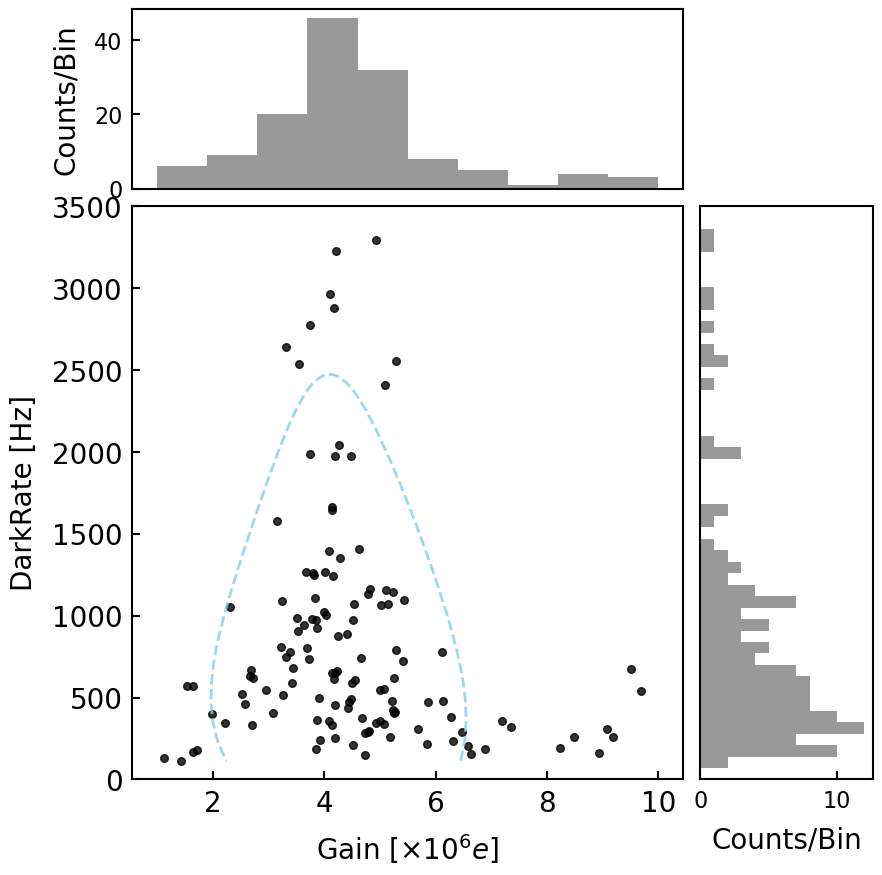

In [72]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(4, 5, figure=fig)  # 增加列数，避免右图重叠
gs.update(wspace=0.1, hspace=0.1)

ax_main = fig.add_subplot(gs[1:, 1:4])
ax_top = fig.add_subplot(gs[0, 1:4], sharex=ax_main)
ax_right = fig.add_subplot(gs[1:, 4], sharey=ax_main)

# 主图
ax_main.scatter(df.Gain, df.DarkRate, s=30, c='black', alpha=0.8)
ax_main.set_ylim(0, 3500)
ax_main.set_xlabel('Gain [$\\times 10^6 e$]', fontsize=20, labelpad=10)
ax_main.set_ylabel('DarkRate [Hz]', fontsize=20, labelpad=10)
ax_main.tick_params(axis='both', direction='in', labelsize=20, length=6, width=1.5, pad=7)

###>>>>>>>>>>>>>>>>>>>> <<<<<<<<<<<<<<<
mask = np.isfinite(df.Gain) & np.isfinite(df.DarkRate)
x = df.Gain[mask].values
y = df.DarkRate[mask].values
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# x= df.Gain.values
# y = df.DarkRate.values
# xy = np.vstack([x, y])
# kde = gaussian_kde(xy)

# 创建网格
xgrid = np.linspace(x.min(), x.max(), 100)
ygrid = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xgrid, ygrid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

# 计算包含 90% 数据点的等高线
Z_flat = Z.flatten()
Z_sorted = np.sort(Z_flat)[::-1]
Z_cumsum = np.cumsum(Z_sorted)
Z_cumsum /= Z_cumsum[-1]
level_90 = Z_sorted[np.searchsorted(Z_cumsum, 0.68)]

# 绘制轮廓线（cartoon contour）
ax_main.contour(X, Y, Z, levels=[level_90], colors='skyblue', alpha=0.8, linewidths=2.0, linestyles='--')
#>>>>>>>>>>>> <<<<<<<<<<<<

# 顶部直方图
ax_top.hist(df.Gain, bins=10, range=(1, 10), histtype='stepfilled', color='grey', alpha=0.8)
ax_top.tick_params(direction='in', length=6, width=1.5, bottom=False, labelbottom=False, labelsize=16, pad=7)
ax_top.set_ylabel("Counts/Bin", fontsize=20, labelpad=10)

# 右侧直方图
ax_right.hist(df.DarkRate, bins=50, range=(0, 3500), histtype='stepfilled', orientation='horizontal', color='grey', alpha=0.8)
ax_right.tick_params(direction='in', length=6, width=1.5, labelsize=16, pad=7, left=False, labelleft=False)
ax_right.set_xlabel("Counts/Bin", fontsize=20, labelpad=10)

# 统一边框粗细
for ax in [ax_main, ax_top, ax_right]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
plt.savefig('figs/gain_darkrate.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import constant as cts

sigma = 3  # 置信区间倍数
# 数据
t = np.array([220.80, 231.18, 233.18, 235.11, 237.00, 252.53, 253.35, 254.15, 254.94, 255.73,
              256.49, 257.24, 257.98, 258.73, 259.45, 260.16, 260.87, 261.55, 262.29, 263.54,
              264.77, 265.96, 267.12, 268.24, 269.34, 270.42, 271.46, 272.48, 273.48, 274.43,
              275.36, 277.69, 278.52, 279.99])

dr0_array = np.array([5.80, 6.04544152, 6.40981034, 6.16849422, 6.45594315, 9.17084984, 9.26996471,
                      9.65603745, 9.72416698, 9.80931059, 9.87510056, 9.9898666, 10.0059838,
                      9.99207125, 10.44491018, 10.69092399, 10.54305022, 11.45711357, 11.51777649,
                      11.88743822, 12.38097099, 12.17552312, 13.11321126, 13.97582976, 14.79300057,
                      15.25664161, 16.28546575, 18.02397621, 19.09499541, 19.96548596, 21.14678853,
                      26.03459381, 26.99482507, 30.49215743])

dr1_array = np.array([5.54461538, 6.39551163, 6.82345497, 7.14025482, 7.50335267, 12.48688251,
                      12.39047973, 12.55929282, 12.97007832, 13.07568891, 12.80846662, 13.25650209,
                      13.44532874, 13.45164785, 13.57838324, 13.62821465, 14.04383137, 13.69223431,
                      13.91178731, 14.23440177, 14.82324472, 15.23127419, 15.41234682, 15.84786519,
                      16.39068533, 16.85082159, 17.37071128, 18.13590531, 19.00333943, 19.27351193,
                      20.75625044, 22.79428038, 24.22673468, 34.4460407])

delta = np.abs(dr1_array - dr0_array)/ dr0_array

# 指数函数
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# 计算 R²
def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# 拟合 dr0_array
popt_dr0, pcov_dr0 = curve_fit(exp_func, t, dr0_array, p0=(1, 0.01, 1))
y_fit_dr0 = exp_func(t, *popt_dr0)
r_squared_dr0 = calculate_r_squared(dr0_array, y_fit_dr0)

# 拟合 dr1_array
popt_dr1, pcov_dr1 = curve_fit(exp_func, t, dr1_array, p0=(1, 0.01, 1))
y_fit_dr1 = exp_func(t, *popt_dr1)
r_squared_dr1 = calculate_r_squared(dr1_array, y_fit_dr1)

# 计算预测不确定度 σ_y
def predict_uncertainty(x, func, popt, pcov):
    eps = np.sqrt(np.finfo(float).eps)
    J = np.empty((len(x), len(popt)))
    for i in range(len(popt)):
        p_delta = np.array(popt)
        p_delta[i] += eps
        J[:, i] = (func(x, *p_delta) - func(x, *popt)) / eps
    sigma_y = np.sqrt(np.sum(J @ pcov * J, axis=1))
    return sigma_y

# 插值
x_fit = np.linspace(220, 281, 300)
# x_fit = np.linspace(220, 281, 34)
y_fit_curve_dr0 = exp_func(x_fit, *popt_dr0)
y_fit_curve_dr1 = exp_func(x_fit, *popt_dr1)
sigma_dr0 = predict_uncertainty(x_fit, exp_func, popt_dr0, pcov_dr0)
sigma_dr1 = predict_uncertainty(x_fit, exp_func, popt_dr1, pcov_dr1)

# 打印拟合参数和误差
print("== LV2204 ==")
print("Fitting parameters (a, b, c):", popt_dr0)
print("Parameter uncertainties (1σ):", np.sqrt(np.diag(pcov_dr0)))
print(f"R²: {r_squared_dr0:.4f}\n")

print("== LV2437 ==")
print("Fitting parameters (a, b, c):", popt_dr1)
print("Parameter uncertainties (1σ):", np.sqrt(np.diag(pcov_dr1)))
print(f"R²: {r_squared_dr1:.4f}\n")


# 绘图
plt.rcParams.update(cts.params)
fig, ax = plt.subplots(figsize=(10, 8))

# labels = rf'$y = {popt_dr0[0]:.2e} \cdot e^{{{popt_dr0[1]:.3f} \cdot x}} + {popt_dr0[2]:.3f}$'
labels = 'y = a $\cdot e^{b\cdot x}$ + c'
plt.scatter(t, dr0_array, s=40, c='grey', marker='o', alpha=0.8, label='')
plt.plot(x_fit, y_fit_curve_dr0, color='black', alpha=0.8, linestyle='--', linewidth = 2,  label='')

'''
# 阴影部分：±2σ
plt.fill_between(x_fit, y_fit_curve_dr0 - sigma * sigma_dr0, y_fit_curve_dr0 + sigma * sigma_dr0,
                 color='m', alpha=0.2, label='')
residuals = dr0_array - y_fit_dr0
std_res = np.std(residuals)
plt.fill_between(x_fit, y_fit_curve_dr0 - 3*std_res, y_fit_curve_dr0 + 3*std_res,
                 color='grey', alpha=0.2, label='Residual 3σ interval')
'''
# # 阴影部分：±2σ
# plt.fill_between(x_fit, y_fit_curve_dr0 - delta , y_fit_curve_dr0 +  delta,
#                  color='grey', alpha=0.2, label='')

# 图形美化
plt.xlabel('Temperature [K]')#, labelpad=20, fontsize=20)
plt.ylabel('Darkrate [Hz]')#, labelpad=20, fontsize=20)
plt.ylim(0, 35)
'''
# plt.legend(loc='upper left', fontsize=12)
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
ax.tick_params(which='both', direction='in', labelsize=20, pad=7, length=6, width=1.5)
ax.tick_params(axis='y', which='major', pad=10)
'''
plt.legend(loc='upper left', fontsize=20, frameon=False,)

textstr = '\n'.join([      
        # rf'$y = {popt_dr0[0]:.2e} \cdot e^{{{popt_dr0[1]:.3f} \cdot x}} + {popt_dr0[2]:.3f}$'
        rf'--- $y = a \cdot e^{{b\cdot x}}$ + c',
        # rf'$a = \quad  {popt_dr0[0]:.2e} \pm {np.sqrt(np.diag(pcov_dr0))[0]:.2e}$',
        rf'$a = \quad  (1.15\pm 1.2) \times 10^{-10}$',
        rf'$b = \quad  {popt_dr0[1]:.2f} \pm {np.sqrt(np.diag(pcov_dr0))[1]:.1f}$',
        rf'$c = \quad  {popt_dr0[2]:.2f} \pm {np.sqrt(np.diag(pcov_dr0))[2]:.1f}$',
        # fr'$\\bullet$ LV2204',
        # fr'y = a $\cdot e^{b\cdot x}$ + c',
        # fr'$\mu_{{SPE}}$:   {mu1:.2f}±{perr[4]:.3f}',
        # fr'$\sigma_{{SPE}}$:   {sigma1:.2f}±{perr[5]:.3f}',
        # fr'$R^{2}$:     {r_squared:.2f}',
        # fr'Res:    {res:.2f}±{res_err:.2f}',
        # fr'Peak-Valley Ratio: {peak_valley_ratio:.2f}'  
])

plt.text(
        0.05, 0.9, textstr,
        transform=plt.gca().transAxes,       
        fontsize=20,
        ha='left',                    
        va='top',
        bbox=dict(facecolor='none', edgecolor='none'),
        linespacing=1.5
)
plt.rcParams.update(cts.params)

# 保存图像
os.makedirs('figs', exist_ok=True)
plt.savefig('figs/dr220k.pdf', bbox_inches='tight')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


== LV2204 ==
Fitting parameters (a, b, c): [1.15147445e-10 9.29555659e-02 6.65163226e+00]
Parameter uncertainties (1σ): [1.26416980e-10 3.92481604e-03 2.77882884e-01]
R²: 0.9901

== LV2437 ==
Fitting parameters (a, b, c): [1.22693247e-06 5.93762381e-02 6.71681374e+00]
Parameter uncertainties (1σ): [3.42506865e-06 9.87928201e-03 1.27588037e+00]
R²: 0.8957



In [1]:
import pandas as pd
import process_data as prc
import matplotlib.pyplot as plt
import  constant as cts

# f1 = '/mnt/data/outnpy/all_dynode_files_combined_alinfo.h5py'
# f1 = '/mnt/data/outnpy/all_dynode_files_combined.h5py'
f1 ='/mnt/data/outnpy/all_dynode_files_combined_corrected_alinfo.h5py'
df1 = pd.read_hdf(f1)
# f2 = '/mnt/data/outnpy/all_anode_files_combined.h5py'
# f2 = '/mnt/data/outnpy/all_anode_files_combined_alinfo.h5py'
f2 = '/mnt/data/outnpy/all_anode_files_combined_corrected_alinfo.h5py'
df2 = pd.read_hdf(f2)

In [2]:
# df2.head(10)

In [3]:
# df2[['voltage', 'PEns', 'PEnsCal', 'w50']], 
# df2[['voltage', 'PEns',  'w50', 'w80']],

In [4]:
# df1[['voltage', 'PEns','PEnsCal', 'w50']]
# 1.29V  3.67PEns
# 1.35V  81.26 

In [5]:
# df1.insert(1, 'PEns',[3.67, 5.79, 18.96, 50.96, 81.26, 115.36, 236.55, 428.29, 791.73, 2023.48, 2821.03 ])
# df2.insert(1, 'PEns',[3.67, 5.79, 18.96, 50.96, 81.26, 115.36, 236.55, 428.29, 791.73, 2023.48, 2821.03 ])

In [ ]:
df1[['voltage','PEns','w50', 'w80', 'w90']], df2[['voltage','PEns','w50', 'w80', 'w90']], 

(    voltage     PEns        w50       w80        w90
 0      1.29     3.67        NaN       NaN        NaN
 1      1.30     5.79  117.51340  34.68768  18.096120
 2      1.32    18.96   35.11816  18.45416  12.435837
 3      1.34    50.96   13.01312   8.07356   5.797636
 4      1.35    81.26    8.16284   5.19448   3.860906
 5      1.36   115.36    5.69688   3.68324   2.787653
 6      1.38   236.55    2.75444   1.74184   1.265667
 7      1.40   428.29    1.58104   1.02692   0.636326
 8      1.43   791.73    0.84988   0.52728   0.405343
 9      1.52  2023.48    0.31624   0.22200   0.180426
 10     1.60  2821.03    0.21232   0.15164   0.122959,
     voltage     PEns       w50       w80        w90
 0      1.29     3.67  17.42024  13.96128  12.272759
 1      1.30     5.79   9.57044   7.61684   6.734146
 2      1.32    18.96   3.07260   2.27576   2.054034
 3      1.34    50.96   1.32216   0.86780   0.695049
 4      1.35    81.26   1.31412   0.82716   0.749890
 5      1.36   115.36   1.61996  

In [7]:
# path_save = "/mnt/data/outnpy/{}_corrected_alinfo.h5py".format('all_dynode_files_combined')
# prc.write_to_hdf5(df1, path_save) 

# path_save = "/mnt/data/outnpy/{}_corrected_alinfo.h5py".format('all_anode_files_combined')
# prc.write_to_hdf5(df2, path_save) 

h5 Write Time: 0.02 s 
h5 File Size: 4.37 MB
Save to /mnt/data/outnpy/all_dynode_files_combined_corrected_alinfo.h5py
h5 Write Time: 0.02 s 
h5 File Size: 4.37 MB
Save to /mnt/data/outnpy/all_anode_files_combined_corrected_alinfo.h5py


/home/yjj/ProcessLocalData/process_data.py:94: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['wf_filtered', 'wf_mean', 'wf_err', 'ftag'], dtype='object')]

  df.to_hdf(filename, key='winfo', mode='w', complib='blosc:blosclz', complevel=9)


(0.022976160049438477, 4577120)

In [3]:
import numpy as np

def fit_x_shift(x1, y1, x2, y2):
    """
    拟合两组数据在 log-log 图下的 x 方向平移倍数
    输入:
        x1, y1: 第一组数据
        x2, y2: 第二组数据
    输出:
        k: x 方向的平移倍数 (x2 ≈ k * x1)
        delta: log10(k)
    """
    # 转对数
    lx1, ly1 = np.log10(x1), np.log10(y1)
    lx2, ly2 = np.log10(x2), np.log10(y2)

    # 找 y 的重叠区间
    ymin, ymax = max(min(ly1), min(ly2)), min(max(ly1), max(ly2))

    mask1 = (ly1 >= ymin) & (ly1 <= ymax)
    mask2 = (ly2 >= ymin) & (ly2 <= ymax)

    # 对重叠区间插值，让 y 相同
    y_common = np.linspace(ymin, ymax, 100)
    lx1_interp = np.interp(y_common, ly1[mask1], lx1[mask1])
    lx2_interp = np.interp(y_common, ly2[mask2], lx2[mask2])

    # 最佳平移量 Δ
    delta = np.mean(lx2_interp - lx1_interp)
    k = 10**delta

    return k, delta


In [4]:

x5 = df1['w50'].values
x8 = df1['w80'].values
x9 = df1['w90'].values
y = df1['PEns'].values

x5_1 = df2['w50'].values[:4]
x8_1 = df2['w80'].values
x9_1 = df2['w90'].values

y1_ = df2['PEns'].values[:4]


k, delta = fit_x_shift(x5[1:], y[1:], x5_1, y1_)
print(f"x2 ≈ {k:.2f} × x1, delta = {delta:.2f}")


x2 ≈ 0.09 × x1, delta = -1.05


In [19]:
# import matplotlib.pyplot as plt
# import  constant as cts

# plt.rcParams.update(cts.params)
# fig, ax = plt.subplots(figsize=(10, 8))


# plt.scatter(x5, y, c='black', marker='x', s=200, cmap='viridis', alpha=0.9, edgecolor='none', label='w50')
# # plt.scatter(x8, y, c='black', marker='o', s=200, cmap='viridis', alpha=0.6, edgecolor='none', label='w80' )
# # plt.scatter(x9, y, c='black', marker='*', s=200,cmap='rainbow', alpha=0.8, edgecolor='none', label='w90')

# plt.scatter(x5_1, y1_, c='grey', marker='+', s=200, cmap='viridis', alpha=0.9, edgecolor='none', label='w50')
# # plt.scatter(x8_1, y, c='grey', marker='.', s=200, cmap='viridis', alpha=0.6, edgecolor='none', label='w80' )
# # plt.scatter(x9_1, y, c='grey', marker='s', s=100,cmap='rainbow', alpha=0.8, edgecolor='none', label='w90')

# plt.xlabel("Dynode duration[us]")
# plt.ylabel("Incident Intensity [PE/ns]")
# # plt.colorbar(label="PEns (color scale)")
# # plt.title("w50 vs PEns with shading")
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(0,2E2)
# plt.ylim(1, 1E4)
# # plt.xticks([])   # 去掉 x 轴刻度 & 标签
# # plt.yticks([])   # 去掉 y 轴刻度 & 标签

# # plt.legend('best')#, frameon=False)
# plt.show()


In [5]:
x1 = x5[1:]
y1= y[1:]
x2 = x5_1
y2 = y1_

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import  constant as cts

plt.rcParams.update(cts.params)
fig, ax = plt.subplots(figsize=(10, 8))

# ====== 1. log-log 拟合 ======
lx1, ly1 = np.log10(x1), np.log10(y1)
lx2, ly2 = np.log10(x2), np.log10(y2)

slope1, intercept1, _, _, _ = linregress(lx1, ly1)
slope2, intercept2, _, _, _ = linregress(lx2, ly2)

# 公共斜率（取平均更稳）
slope = (slope1 + slope2) / 2

# ====== 2. 生成拟合曲线 ======
x_fit = np.logspace(-1, 2.25, 200)
y_fit1 = 10**(slope * np.log10(x_fit) + intercept1)
y_fit2 = 10**(slope * np.log10(x_fit) + intercept2)

# ====== 3. 计算平移倍数 ======
delta_c = intercept1 - intercept2
k = 10**(delta_c / slope)   # 横坐标缩放倍数

# ====== 4. 平移后的曲线 ======
x1_shifted = x_fit * k
y1_shifted = y_fit1

# ======= 5. dynode 6 预测 =====
gain_ratio = 446/113
gain_ratio_1 = 1735.7/113
shift_factor = 10 * gain_ratio
shift_factor_1 = 10 * gain_ratio_1
x_dyn6 = x_fit * (shift_factor/10)
y_dyn6 = y_fit1

x_dyn5 = x_fit * (shift_factor_1/10)
y_dyn5 = y_fit1

# 原始散点
plt.scatter(x1, y1, marker='o', s=100, color='k', label="Dynode")
plt.scatter(x2, y2, marker='*', s=100, color='black', label="Anode")

# 拟合曲线
plt.plot(x_fit, y_fit1, 'r--', alpha=0.5, label="")
plt.plot(x_fit, y_fit2, 'b--', alpha=0.5, label="")

# 平移后的曲线
# plt.plot(x1_shifted, y1_shifted, 'r--', label=f"Dynode shifted")
# # 预测Dynode 6 曲线
plt.plot(x_dyn6, y_dyn6, 'g--', label="Dynode 6")
plt.plot(x_dyn5, y_dyn5, 'y--', label="Dynode 5")

plt.xscale("log")
plt.yscale("log")
plt.xlim(0,3E2)
plt.ylim(1, 1E4)
plt.xlabel("Dynode duration [us]")
plt.ylabel("Incident Intensity [PE/ns]")
plt.legend(
    loc="lower left",   # 位置
    fontsize=20,          # 字体大小
    frameon=False,        # 显示边框
    fancybox=True,       # 圆角边框
    framealpha=0.,      # 边框透明度 (0 完全透明, 1 不透明)
    ncol=1,              # 列数
    markerscale=0.8,     # 缩小 legend 里的点/线标记
    borderpad=0.3,       # legend 内边距
    labelspacing=0.3     # 行间距
)

# plt.legend()#'upper right')#,fontsize=10, shadow=False, frameon=False, fancybox=False, framealpha=0.8, ncol=1)
plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.savefig("figs/w50_PEnsCal_anode.png", dpi=600 )#, transparent=True, bbox_inches='tight')

plt.show()


/tmp/ipykernel_2374348/1102059768.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,3E2)


In [8]:
import numpy as np
import matplotlib
# matplotlib.rcParams['font.family'] = 'Times New Roman'
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

In [9]:
muon_s2_ch_perate_duration = np.load('/mnt/data/outnpy/muon_s2_data.npy')

In [10]:
y_fit1 = 10**(slope * np.log10(x_fit) + intercept1)
y_fit2 = 10**(slope * np.log10(x_fit) + intercept2)

In [11]:
dur=muon_s2_ch_perate_duration['duration']
pe=muon_s2_ch_perate_duration['num_pe_per_ns']

In [12]:
len(pe[pe<10**(slope * np.log10(dur) + intercept1)])/len(pe)

/tmp/ipykernel_2374348/40088736.py:1: RuntimeWarning: divide by zero encountered in log10
  len(pe[pe<10**(slope * np.log10(dur) + intercept1)])/len(pe)


0.6791339036457175

In [15]:
len(pe[pe<10**(slope * np.log10(dur) + intercept2)])/len(pe)

/tmp/ipykernel_2374348/528371098.py:1: RuntimeWarning: divide by zero encountered in log10
  len(pe[pe<10**(slope * np.log10(dur) + intercept2)])/len(pe)


0.11732700449276008

In [26]:
len(pe[pe<10**(slope * np.log10(dur) + intercept1 - slope * np.log10(shift_factor/10))])/len(pe)

/tmp/ipykernel_2374348/841245672.py:1: RuntimeWarning: divide by zero encountered in log10
  len(pe[pe<10**(slope * np.log10(dur) + intercept1 - slope * np.log10(shift_factor/10))])/len(pe)


0.9364488972388444

In [27]:
len(pe[pe<10**(slope * np.log10(dur) + intercept1 - slope * np.log10(shift_factor_1/10))])/len(pe)

/tmp/ipykernel_2374348/4237454280.py:1: RuntimeWarning: divide by zero encountered in log10
  len(pe[pe<10**(slope * np.log10(dur) + intercept1 - slope * np.log10(shift_factor_1/10))])/len(pe)


0.9842590443425563

In [40]:
# plt.rcParams.update({
#     'font.family': 'serif',
#     'font.size': 14,
#     'axes.labelsize': 16,
#     'axes.titlesize': 16,
#     'xtick.labelsize': 12,
#     'ytick.labelsize': 12,
#     'axes.linewidth': 1.5,
#     'xtick.direction': 'in',
#     'ytick.direction': 'in',
#     'savefig.bbox': 'tight',
#     'figure.facecolor': 'w'
# })


plt.rcParams.update(cts.params)
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# --- 第一个图 ---
# 设置 bins
bins1 = (
    # np.linspace(0, 200, 50),
    np.logspace(-1, np.log10(250), 50),
    np.logspace(-1, 4, 50)
)

# 创建图形并绘图
fig, ax = plt.subplots(figsize=(10, 8))
count, x, y, image = ax.hist2d(
    muon_s2_ch_perate_duration['duration'],
    muon_s2_ch_perate_duration['num_pe_per_ns'],
    bins=bins1,
    norm=LogNorm(),
    cmap='viridis'
    # cmap='jet'
)


# 原始散点
# plt.scatter(x1, y1, marker='o', s=120, color='k', label="Dynode")
# plt.scatter(x2, y2, marker='*', s=120, color='black', label="Anode")
plt.scatter(x2, y2, marker='^', s=120,  color=color_list[1], linewidths=1.5, label="")
plt.scatter(x1, y1, marker='o', s=150, color=color_list[3], linewidths=1.5, label="")

plt.plot(x_fit, y_fit2, color=color_list[1], linestyle='--', alpha=0.8, label="Anode")
plt.plot(x_fit, y_fit1, color=color_list[3], linestyle='--', alpha=0.8, label="Dy7")
plt.plot(x_dyn6, y_dyn6, color='magenta', linestyle='--', linewidth=2, alpha=0.8,  label="Dy6")
plt.plot(x_dyn5, y_dyn5, color='blue', linestyle='--', linewidth=2, alpha=0.8, label="Dy5")


fig.colorbar(image, label='Counts')

# 设置坐标轴和标签
ax.set_xlabel(r'Muon S2 Duration [$\mu$s]')
ax.set_ylabel(r'Avg PE Rate [PE$\cdot$ns$^{-1}$$\cdot$ch$^{-1}$]')
ax.set_yscale('log')
ax.set_xscale('log')

plt.legend(
    loc="upper right",   # 位置
    fontsize=20,          # 字体大小
    frameon=False,        # 显示边框
    fancybox=True,       # 圆角边框
    framealpha=0.,      # 边框透明度 (0 完全透明, 1 不透明)
    ncol=1,              # 列数
    markerscale=0.8,     # 缩小 legend 里的点/线标记
    borderpad=0.3,       # legend 内边距
    labelspacing=0.3     # 行间距
)

plt.savefig("./figs/PEns_duration.png")
plt.show()

In [122]:
np.exp(np.log(113/17.5*22.5))

145.28571428571428